In [6]:
import torch
import numpy as np
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

**手动生成回归任务的数据集，要求：**  
* 生成单个数据集。
* 数据集的大小为10000且训练集大小为7000，测试集大小为3000。
* 数据集的样本特征维度p为500，且服从如下的高维线性函数：y= 0.028 + 0.0056xi + error

In [7]:
features = torch.rand(10000, 500)
labels = (0.0056 * features).sum(dim=1) + 0.028
labels += torch.tensor(np.random.normal(0,0.01,size=labels.size()), dtype=torch.float)

train_features = features[:7000,:]
train_labels = labels[:7000]

test_features = features[7000:,:]
test_lables = labels[7000:]

**手动生成二分类任务的数据集,要求:**

* 共生成两个数据集。
* 两个数据集的大小均为10000且训练集大小为7000，测试集大小为3000。
* 两个数据集的样本特征x的维度均为200，且分别服从均值互为相反数且方差相同的正态分布。
* 两个数据集的样本标签分别为0和1。

In [3]:
x1 = torch.tensor(np.random.normal(2,1,(10000,200)), dtype=torch.float)
x1_labels = torch.ones((10000))
x2 = torch.tensor(np.random.normal(-2,1,(10000,200)), dtype=torch.float)
x2_labels = torch.zeros((10000))
class_2_features = torch.cat((x1,x2),dim=0)
class_2_labels = torch.cat((x1_labels,x2_labels))
index = [i for i in range(len(class_2_labels))]
np.random.shuffle(index)
train_class_2_features = class_2_features[index[:14000],:]
test_class_2_features = class_2_features[index[14000:],:]
train_class_2_labels = class_2_labels[index[:14000]]
test_class_2_labels = class_2_labels[index[14000:]]

**MNIST手写体数据集介绍：**
* 该数据集包含60,000个用于训练的图像样本和10,000个用于测试的图像样本。
* 图像是固定大小（28×28像素），其值为0到1。为每个图像都被平展并转换为784（28×28）个特征的一维numpy数组

In [2]:
#下载MNIST手写数字数据集
train_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=True, transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./Datasets/MNIST', train=False, transform = transforms.ToTensor(),download=True)

In [3]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

In [4]:
for X, y in train_loader:
    print(X.shape, y.shape)
    break

torch.Size([32, 1, 28, 28]) torch.Size([32])


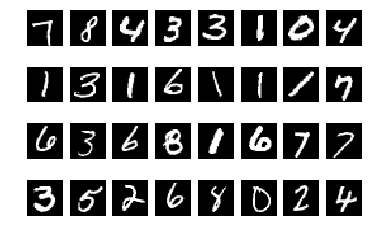

In [5]:
for X, y in train_loader:
    for i in range(32):
        feature = X[i,:,:,:]
        plt.subplot(4,8,i+1)
        plt.axis('off')
        plt.imshow(feature[0,:,:],cmap ='gray')
    plt.savefig('MNIST.jpg')
    break